In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [0]:
base_folder_address=os.getcwd()+"/drive/My Drive/project/Project-Files/Dataset_2/Scissors/00012 (3).jpg"

## **Reading the Image and Resizing**

In [0]:
image = cv2.imread(base_folder_address)
image = cv2.resize(image, (100, 100))

## Display

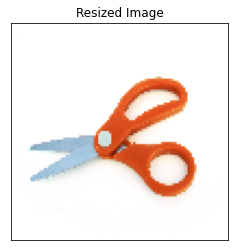

In [65]:
plt.imshow(image), plt.title("Resized Image")
plt.xticks([]), plt.yticks([])
plt.show()

## **Denoising - Gaussian Blur**

In [0]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)

## Display

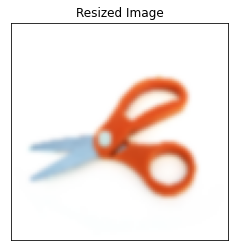

In [67]:
plt.imshow(blurred), plt.title("Resized Image")
plt.xticks([]), plt.yticks([])
plt.show()

# **Segmentation & Morphology**

## **Segmentation: Graying and Tresholding**

In [0]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

## Display

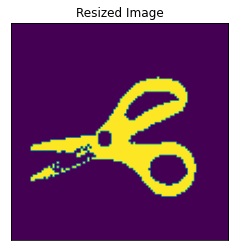

In [69]:
plt.imshow(thresh), plt.title("Resized Image")
plt.xticks([]), plt.yticks([])
plt.show()

## **Morphology: Noise Removal**

In [0]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

### **Background**

In [0]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

## Display

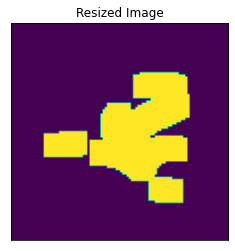

In [72]:
plt.imshow(sure_bg), plt.title("Resized Image")
plt.xticks([]), plt.yticks([])
plt.show()

### **Foreground**

In [0]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

## Display

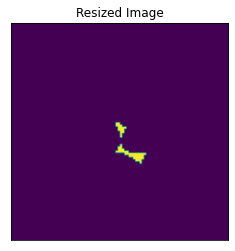

In [74]:
plt.imshow(sure_fg), plt.title("Resized Image")
plt.xticks([]), plt.yticks([])
plt.show()

### **Unknown Region**

In [0]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

## Display

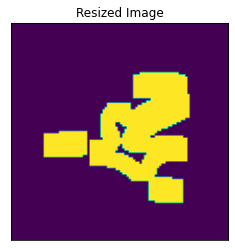

In [76]:
plt.imshow(unknown), plt.title("Resized Image")
plt.xticks([]), plt.yticks([])
plt.show()

### **Markers**

In [0]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

## Display Final

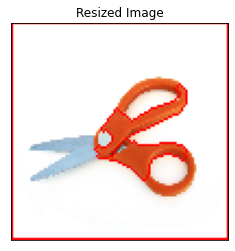

In [78]:
plt.imshow(image), plt.title("Resized Image")
plt.xticks([]), plt.yticks([])
plt.show()

## Display Thresh

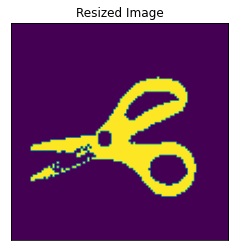

In [79]:
plt.imshow(thresh), plt.title("Resized Image")
plt.xticks([]), plt.yticks([])
plt.show()